# Example file for the method CMI-IVA

In [ ]:
# Check if CMI-IVA and IVA is available or not. If not install using
pip install independent_vector_analysis
pip install iva-order-selection
# or use the the function order_selection_iva.py

In [1]:
# Check if IVA is available or not. If not install
import importlib.util
package_name = 'independent_vector_analysis'

spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +' is not installed, please install it below command:')
    print('pip install independent_vector_analysis')
else:
    print(package_name + ' package is installed')

independent_vector_analysis package is installed


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from independent_vector_analysis.data_generation import *
from iva_order_selection import order_selection_iva

# Generate simulated sources using multivariate generalized Gaussian distribution (MGGD) 

In [3]:
N = 10
T = 1000
K = 15
rho = [0.9,0.8,0.7]
B = 1

source_mat = np.zeros((N,T,K))
scv_cov_mat = np.zeros((K,K,N))

for i in range(len(rho)):
    (temp,scv_cov_mat[:,:,i]) = MGGD_generation(T,K,'uniform',rho[i],0.5)
    source_mat[i,:,:] = temp.T

(temp,scv_cov_mat[:,:,len(rho)]) = MGGD_generation(T,K,'block',{'val': 0.01, 'blocks': [(0.9, 0, 6), (0.01, 7,14)]},0.5)
source_mat[len(rho),:,:] = temp.T

for i in range(len(rho)+1,N,1):
    (temp,scv_cov_mat[:,:,i]) = MGGD_generation(T,K,'ar',0.01,0.5)
    source_mat[i,:,:] = temp.T

# Plot source covariance matrices (Source Component Vectors (SCV))

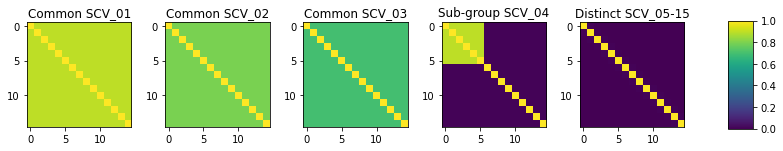

In [4]:
number_of_plots = 5
num_rows = 1
num_clms = 5
fig,axs = plt.subplots(num_rows,num_clms,figsize=(12, 12))
plt.tight_layout()

for pp in range(number_of_plots):
    ax  = axs[pp]
    c  = ax.imshow(np.abs(scv_cov_mat[:,:,pp]), vmin=0, vmax= 1)

# Title for each subplots
axs[0].title.set_text('Common SCV_01')
axs[1].title.set_text('Common SCV_02')
axs[2].title.set_text('Common SCV_03')
axs[3].title.set_text('Sub-group SCV_04')
axs[4].title.set_text('Distinct SCV_05-15')

# Colorbar adjustment
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.445, 0.03, 0.125])
fig.colorbar(c, cax=cbar_ax)
plt.show()

# Generate mixing matrices A and simulated datasets X 

In [5]:
mix_mat = np.random.randn(N,N,K)
data_mat = np.zeros((N,T,K))
for k in range(K):
    data_mat[:,:,k] = mix_mat[:,:,k]@source_mat[:,:,k]

cov_mat = np.zeros((N,N,K));
for k in range(K):
    cov_mat[:,:,k] = np.corrcoef(data_mat[:,:,k])

# Apply CMI-IVA with IVA with Gaussian distribution (IVA-G)

In [6]:
iva_results, Order, Corr_struct = order_selection_iva(data_mat)

# Generate results and compare with ground truth data

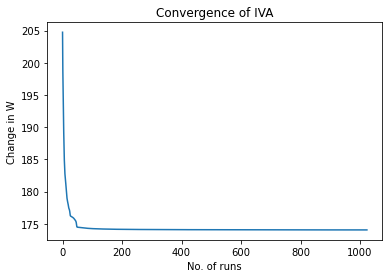

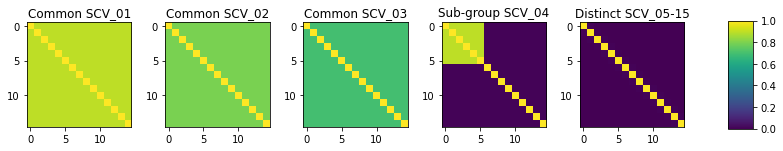

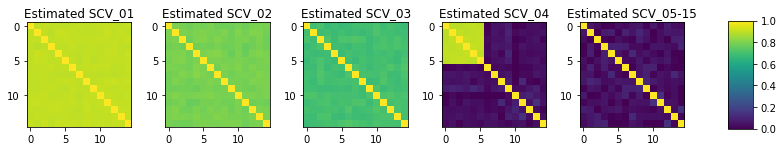

In [7]:
de_scv_cov_mat = iva_results[2];
change_w = iva_results[1];

# IVA change in W 
plt.figure()
plt.plot(change_w)
plt.xlabel("No. of runs")
plt.ylabel("Change in W")
plt.title("Convergence of IVA")

# plot and compare ground truth vs estimated results
number_of_plots = 5
num_rows = 1
num_clms = 5
fig,axs = plt.subplots(num_rows,num_clms,figsize=(12, 12))
plt.tight_layout()

fig0,axs0 = plt.subplots(num_rows,num_clms,figsize = (12,12))
plt.tight_layout()

for pp in range(number_of_plots):
    ax  = axs[pp]
    c  = ax.imshow(np.abs(scv_cov_mat[:,:,pp]), vmin=0, vmax= 1)
    ax0  = axs0[pp]
    c0  = ax0.imshow(np.abs(de_scv_cov_mat[:,:,pp]), vmin=0, vmax= 1)

# Title for each subplots 
# True sources
axs[0].title.set_text('Common SCV_01')
axs[1].title.set_text('Common SCV_02')
axs[2].title.set_text('Common SCV_03')
axs[3].title.set_text('Sub-group SCV_04')
axs[4].title.set_text('Distinct SCV_05-15')
# Estimated sources
axs0[0].title.set_text('Estimated SCV_01')
axs0[1].title.set_text('Estimated SCV_02')
axs0[2].title.set_text('Estimated SCV_03')
axs0[3].title.set_text('Estimated SCV_04')
axs0[4].title.set_text('Estimated SCV_05-15')


# Colorbar Adjustment
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.445, 0.03, 0.125])
fig.colorbar(c, cax=cbar_ax)

fig0.subplots_adjust(right=0.8)
cbar_ax = fig0.add_axes([0.85, 0.445, 0.03, 0.125])
fig0.colorbar(c0, cax=cbar_ax)
plt.show()

# Plot common order selection results

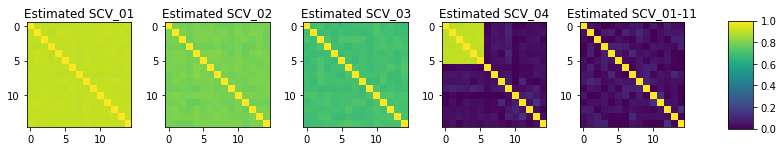

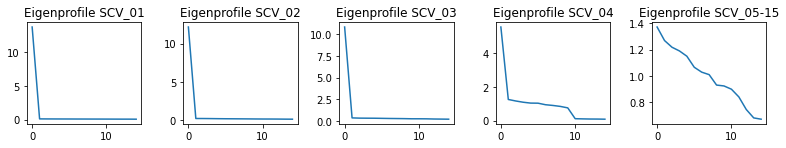

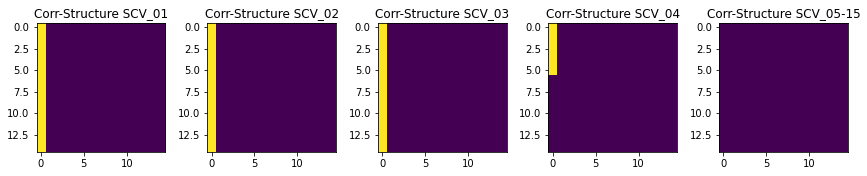

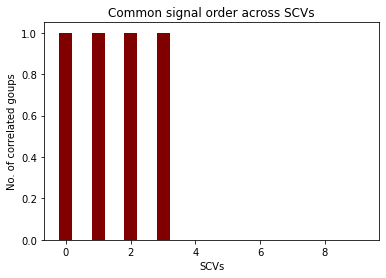

In [10]:
eig_val = Corr_struct['eig']
struc_plot = Corr_struct['eig_str']
values = Order['mdl_results']

number_of_plots = 5
num_rows = 1
num_clms = 5
fig0,axs0 = plt.subplots(num_rows,num_clms,figsize = (12,12))
plt.tight_layout()
fig1,axs1 = plt.subplots(num_rows,num_clms,figsize = (11,2))
plt.tight_layout()
fig,axs = plt.subplots(num_rows,num_clms,figsize=(12, 12))
plt.tight_layout()

for pp in range(number_of_plots):
    ax0  = axs0[pp]
    c0  = ax0.imshow(np.abs(de_scv_cov_mat[:,:,pp]), vmin=0, vmax= 1)
    
# Estimated sources
axs0[0].title.set_text('Estimated SCV_01')
axs0[1].title.set_text('Estimated SCV_02')
axs0[2].title.set_text('Estimated SCV_03')
axs0[3].title.set_text('Estimated SCV_04')
axs0[4].title.set_text('Estimated SCV_01-11')


fig0.subplots_adjust(right=0.8)
cbar_ax = fig0.add_axes([0.85, 0.445, 0.03, 0.125])
fig.colorbar(c0, cax=cbar_ax)

for pp in range(number_of_plots):
    c1 = axs1[pp].plot(eig_val[:,pp])
    ax  = axs[pp]
    c  = ax.imshow(np.abs(struc_plot[:,:,pp]), vmin=0, vmax= 1)
    
# Eigen profile
axs1[0].title.set_text('Eigenprofile SCV_01')
axs1[1].title.set_text('Eigenprofile SCV_02')
axs1[2].title.set_text('Eigenprofile SCV_03')
axs1[3].title.set_text('Eigenprofile SCV_04')
axs1[4].title.set_text('Eigenprofile SCV_05-15')


# Correlation structure
axs[0].title.set_text('Corr-Structure SCV_01')
axs[1].title.set_text('Corr-Structure SCV_02')
axs[2].title.set_text('Corr-Structure SCV_03')
axs[3].title.set_text('Corr-Structure SCV_04')
axs[4].title.set_text('Corr-Structure SCV_05-15')

# creating the bar plot
plt.figure()
plt.bar(np.arange(N), values, color ='maroon',
        width = 0.4)
 
plt.xlabel("SCVs")
plt.ylabel("No. of correlated goups")
plt.title("Common signal order across SCVs")
plt.show()
